# Notebook to plot initial conditions of idealised simulation. 

Import libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
import cmocean as cm
import colorcet as ccet

from matplotlib import colors
from matplotlib.gridspec import GridSpec

In [3]:
# Import utilities
from utils import Import_Expt_Front, date_fmt

## Load data

Open grid file and define the grid dimensions

In [4]:
grid = xr.open_dataset('/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/ICE-CHANEL/GRID/domain_cfg_500x250.nc')

In [5]:
# Define dimensions
Nx, Ny, Nz = 499, 251, 61

X = np.ones((Ny,Nx,Nz)) * grid.nav_lon.values[1:-1,1:-1,np.newaxis]
Y = np.ones((Ny,Nx,Nz)) * grid.nav_lat.values[1:-1,1:-1,np.newaxis]
Z = -np.ones((Ny,Nx,Nz)) * grid.e3t_1d.cumsum().sel(nav_lev=slice(0,200)).values[:]

In [6]:
init_cond="/home1/datahome/jmartine/datawork/init/ice_form/"

Load data of each experiment (No Front, Weak Front, and Strong Front)

In [7]:
gamma=0
nemo_version=4
no_front = xr.open_dataset(init_cond+'Channel_Oce_pt_noise_pS_1000_5000_grid_freezing_point_75m_lin_strat_depth_6months_magnitude_conserved_contents_no_TEMP_grad_{0}_nemo{1}.nc'.format(gamma,nemo_version))

In [8]:
gamma=0.5
nemo_version=4
weak_front = xr.open_dataset(init_cond+'Channel_Oce_pt_noise_pS_1000_5000_grid_freezing_point_75m_lin_strat_depth_6months_magnitude_conserved_contents_no_TEMP_grad_{0}_nemo{1}.nc'.format(gamma,nemo_version))

In [9]:
gamma=1
nemo_version=4
strong_front = xr.open_dataset(init_cond+'Channel_Oce_pt_noise_pS_1000_5000_grid_freezing_point_75m_lin_strat_depth_6months_magnitude_conserved_contents_no_TEMP_grad_{0}_nemo{1}.nc'.format(gamma,nemo_version))

### Plot inital conditions

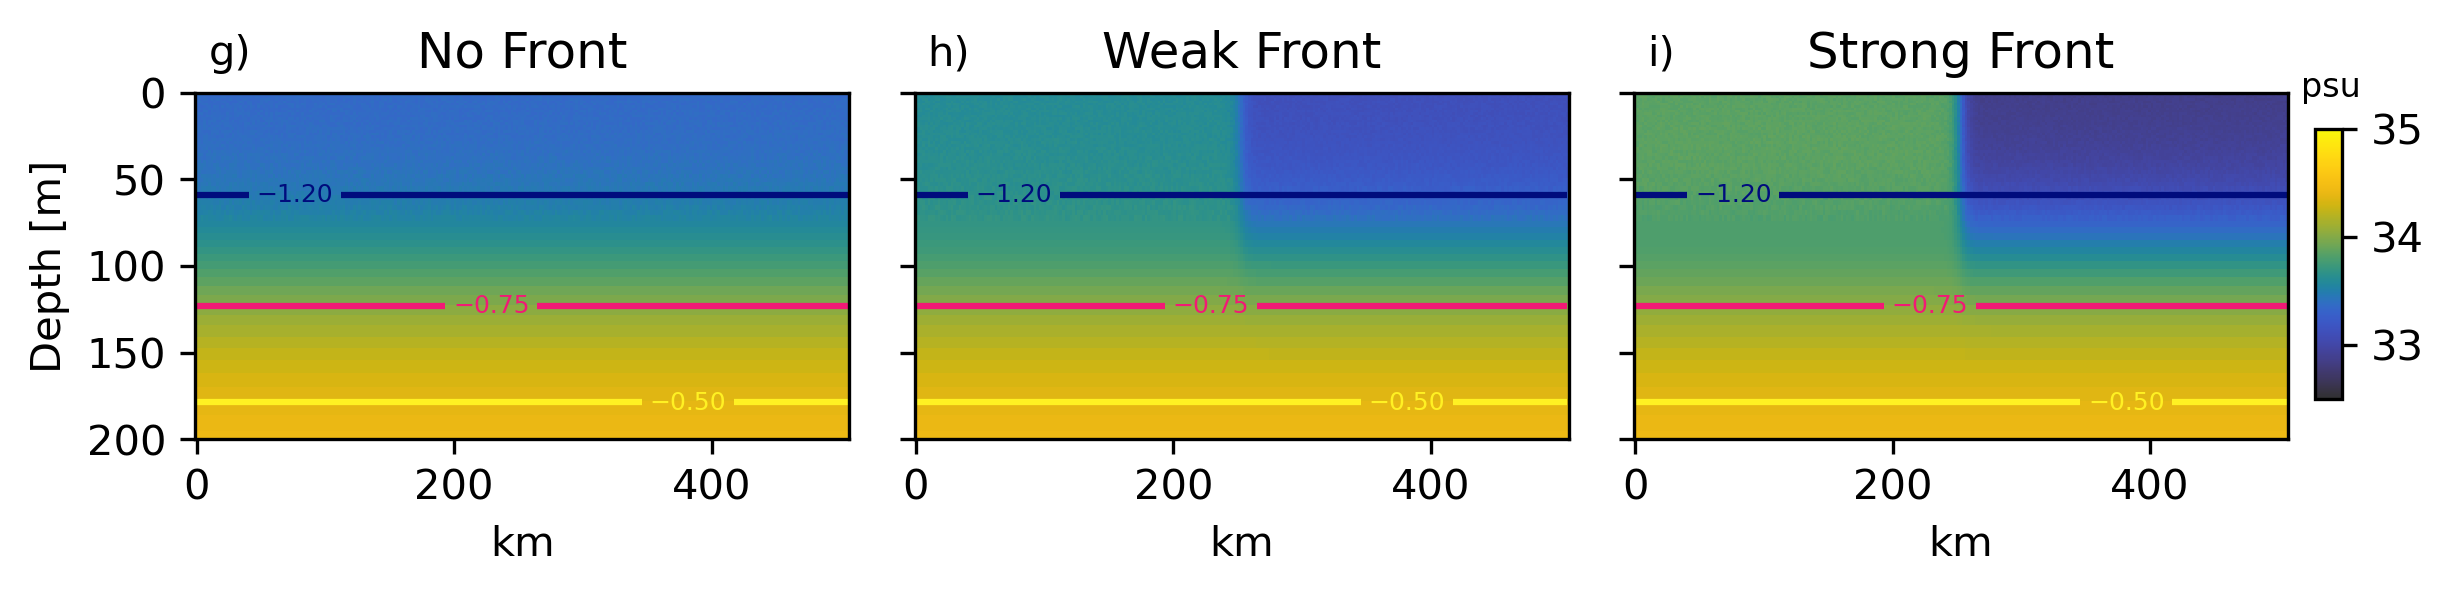

In [10]:
fig = plt.figure(dpi=300, figsize=(9,1.5))

gs = GridSpec(1, 3, figure=fig)


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])


############################################################################################################
############################# Plot No Front Initial Conditions #############################################
############################################################################################################

salt_bar = no_front.vosaline.isel(time=0,x=0).plot(ax=ax1,add_colorbar=False,vmin=32.5,vmax=35,cmap=ccet.cm.gouldian,rasterized=True)
CS = no_front.votemper.isel(time=0,x=0).plot.contour(ax=ax1,add_colorbar=False,vmin=-1.8,vmax=-0.5,levels=[-0.5,-0.75,-1.2],cmap=ccet.cm.bmy)
ax1.clabel(CS, inline=1, fontsize=6)

ax1.set_ylim((0,200))
ax1.invert_yaxis()
ax1.set_title('No Front')
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('km')

############################################################################################################
########################### Plot Weak Front Initial Conditions #############################################
############################################################################################################

weak_front.vosaline.isel(time=0,x=0).plot(ax=ax2,add_colorbar=False,vmin=32.5,vmax=35,cmap=ccet.cm.gouldian,rasterized=True)
CS = weak_front.votemper.isel(time=0,x=0).plot.contour(ax=ax2,add_colorbar=False,vmin=-1.8,vmax=-0.5,levels=[-0.5,-0.75,-1.2],cmap=ccet.cm.bmy)
ax2.clabel(CS, inline=1, fontsize=6)

ax2.set_ylim((0,200))
ax2.invert_yaxis()
ax2.set_title('Weak Front')
ax2.set_ylabel('')
ax2.set_xlabel('km')
ax2.set_yticklabels([])

############################################################################################################
########################### Plot Strong Front Initial Conditions ###########################################
############################################################################################################

strong_front.vosaline.isel(time=0,x=0).plot(ax=ax3,add_colorbar=False,vmin=32.5,vmax=35,cmap=ccet.cm.gouldian,rasterized=True)
CS = strong_front.votemper.isel(time=0,x=0).plot.contour(ax=ax3,add_colorbar=False,vmin=-1.8,vmax=-0.5,levels=[-0.5,-0.75,-1.2],cmap=ccet.cm.bmy)
ax3.clabel(CS, inline=1, fontsize=6)

ax3.set_ylim((0,200))
ax3.invert_yaxis()
ax3.set_title('Strong Front')
ax3.set_ylabel('')
ax3.set_xlabel('km')

ax3.set_yticklabels([])

# Add colorbar

cax = fig.add_axes([0.91, 0.2, 0.01, 0.6])
fig.colorbar(salt_bar, cax=cax, orientation='vertical')
cax.text(-0.5,35.3,'psu',fontsize=8)


ax1.text(0.02, 1.08, "g)", fontsize=10, transform=ax1.transAxes)
ax2.text(0.02, 1.08, "h)", fontsize=10, transform=ax2.transAxes)
ax3.text(0.02, 1.08, "i)", fontsize=10, transform=ax3.transAxes)

# Save figure
plt.subplots_adjust(hspace=0.2,wspace=0.1)
plt.savefig('./figures/Fig_1_init_conds.pdf',dpi=300,bbox_inches='tight')

## 3D Plot

Select and slice the initial conditions data

In [11]:
init_data_salt_no_f = no_front.vosaline.isel(time=0).transpose("y","x","z").isel(y=slice(1,-1),x=slice(1,-1)).sel(z=slice(0,200))
init_data_salt_weak = weak_front.vosaline.isel(time=0).transpose("y","x","z").isel(y=slice(1,-1),x=slice(1,-1)).sel(z=slice(0,200))
init_data_salt_norm = strong_front.vosaline.isel(time=0).transpose("y","x","z").isel(y=slice(1,-1),x=slice(1,-1)).sel(z=slice(0,200))

In [12]:
init_data_temp_no_f = no_front.votemper.isel(time=0).transpose("y","x","z").isel(y=slice(1,-1),x=slice(1,-1)).sel(z=slice(0,200))
init_data_temp_weak = weak_front.votemper.isel(time=0).transpose("y","x","z").isel(y=slice(1,-1),x=slice(1,-1)).sel(z=slice(0,200))
init_data_temp_norm = strong_front.votemper.isel(time=0).transpose("y","x","z").isel(y=slice(1,-1),x=slice(1,-1)).sel(z=slice(0,200))

Functions to format 3d plot axis.

In [13]:
def format_3daxis(ax):
    ax.patch.set_alpha(0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.zaxis.set_major_locator(plt.MaxNLocator(3))
    
    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # Plot edges
    edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)

    ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

    # Set labels and zticks
    ax.set(
        xlabel='X [km]',
        ylabel='Y [km]',
        zlabel='Deptht [m]',
        zticks=[0, -75, -150],
        xticks=[-400, 0, 400],
        yticks=[-150, 0, 150],
    )

    # Set zoom and angle view
    ax.view_init(40, -60, 0)
    ax.set_box_aspect((1.5,1,0.6), zoom=0.9)
    
def contour_rasterize(contour):
    for pathcoll in contour.collections:
        pathcoll.set_rasterized(True)

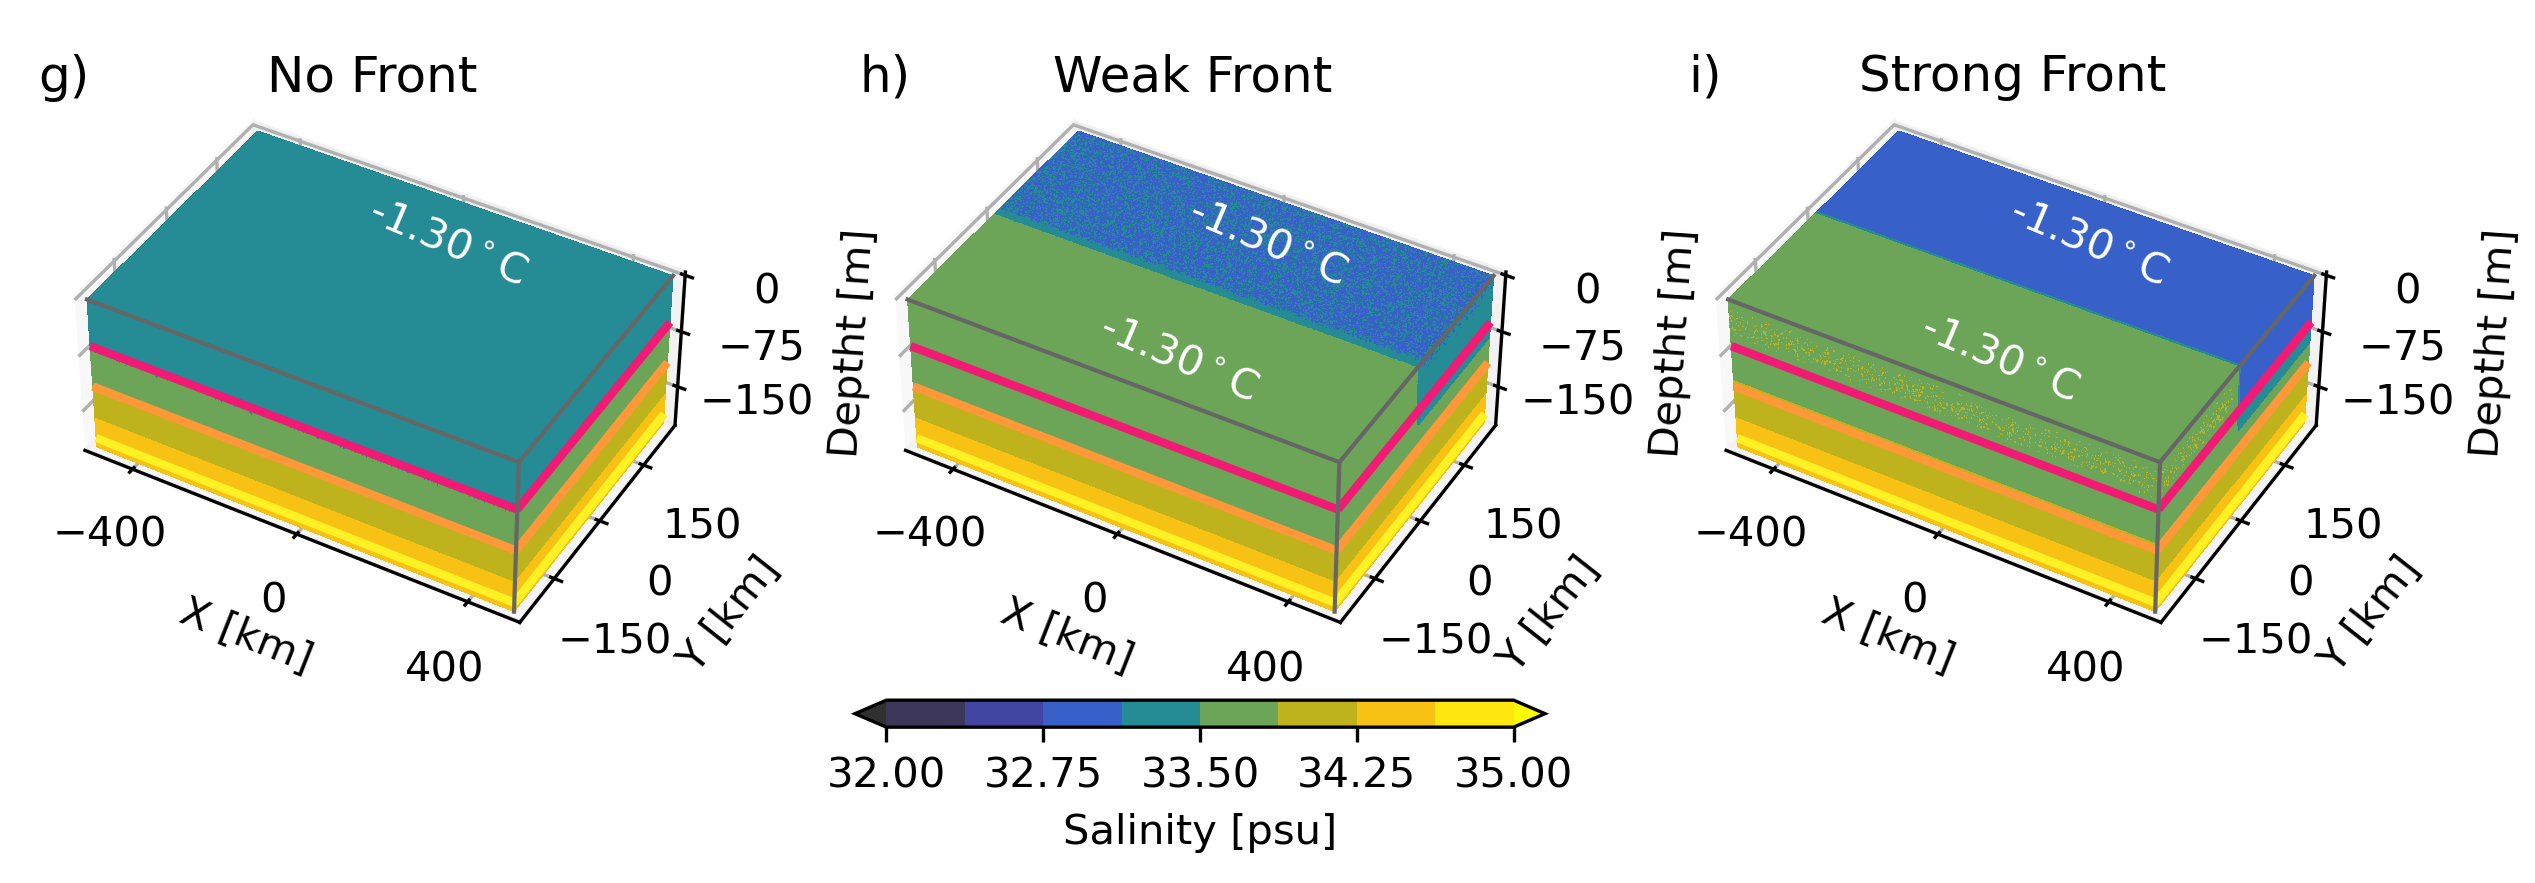

In [14]:
from matplotlib import colors
# Create a figure with 3D ax
fig = plt.figure(figsize=(10, 3),dpi=300)

########################################################################
ax1 = fig.add_subplot(131, projection='3d',computed_zorder=False)

kw = {
    'vmin': 32,
    'vmax': 35,
    'levels': np.linspace(32,35,9),
    'cmap': ccet.cm.gouldian,
    'extend':'both',
    'zorder':-1
}

# Plot contour surfaces
_t = ax1.contourf(
    X[:, :, 0], Y[:, :, 0], init_data_salt_no_f[:, :, 0].values,
    zdir='z', offset=0, **kw
)

_r = ax1.contourf(
    X[0, :, :], init_data_salt_no_f[1, :, :-1].values, Z[0, :, :],
    zdir='y', offset=Y.min(), **kw
)
C1 = ax1.contourf(
    init_data_salt_no_f[:, -1, :-1].values, Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)

# [contour_rasterize(c) for c in [_t, _r, C1] ]

########################################################################

ax2 = fig.add_subplot(132, projection='3d',computed_zorder=False)

# Plot contour surfaces
_t = ax2.contourf(
    X[:, :, 0], Y[:, :, 0], init_data_salt_weak[:, :, 0].values,
    zdir='z', offset=0, **kw
)
_r = ax2.contourf(
    X[0, :, :], init_data_salt_weak[1, :, :-1].values, Z[0, :, :],
    zdir='y', offset=Y.min(), **kw
)
C1 = ax2.contourf(
    init_data_salt_weak[:, -1, :-1].values, Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)

# [contour_rasterize(c) for c in [_t, _r, C2] ]

########################################################################

ax3 = fig.add_subplot(133, projection='3d',computed_zorder=False)

# Plot contour surfaces
_t = ax3.contourf(
    X[:, :, 0], Y[:, :, 0], init_data_salt_norm[:, :, 0].values,
    zdir='z', offset=0, **kw
)
_r = ax3.contourf(
    X[0, :, :], init_data_salt_norm[1, :, :-1].values, Z[0, :, :],
    zdir='y', offset=Y.min(), **kw
)
C1 = ax3.contourf(
    init_data_salt_norm[:, -1, :-1].values, Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)

########################################################################

kw = {
    'vmin': -1.9,
    'vmax': -0.5,
    'levels': np.linspace(-1.9,-0.5,5),
    'cmap': ccet.cm.bmy,
    'linewidths':2,
    'zorder':2
}

# Plot contour surfaces
_t = ax1.contour(
    X[:, :, 0], Y[:, :, 0], init_data_temp_no_f[:, :, 0].values,
    zdir='z', offset=0.1, **kw
)
_r = ax1.contour(
    X[0, :, :], init_data_temp_no_f[1, :, :-1].values, Z[0, :, :],
    zdir='y', offset=Y.min(), **kw
)
C2 = ax1.contour(
    init_data_temp_no_f[:, -1, :-1].values, Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)

ax1.text2D(0.61, 0.69, '{:.2f}$^\circ$C'.format(init_data_temp_no_f[:,:,0].mean()), 
           horizontalalignment='center', verticalalignment='center', color="w",
           rotation=-23, transform = ax1.transAxes,fontsize=10)

########################################################################

# Plot contour surfaces
_t = ax2.contour(
    X[:, :, 0], Y[:, :, 0], init_data_temp_weak[:, :, 0].values,
    zdir='z', offset=0, **kw
)
_r = ax2.contour(
    X[0, :, :], init_data_temp_weak[1, :, :-1].values, Z[0, :, :],
    zdir='y', offset=Y.min(), **kw
)
C2 = ax2.contour(
    init_data_temp_weak[:, -1, :-1].values, Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)


ax2.text2D(0.61, 0.69, '{:.2f}$^\circ$C'.format(init_data_temp_weak[:,:,0].min()), 
           horizontalalignment='center', verticalalignment='center', color="w",
           rotation=-23, transform = ax2.transAxes,fontsize=10)

ax2.text2D(0.48, 0.52, '{:.2f}$^\circ$C'.format(init_data_temp_weak[:,:,0].max()), 
           horizontalalignment='center', verticalalignment='center', color="w",
           rotation=-23, transform = ax2.transAxes,fontsize=10)

########################################################################

# Plot contour surfaces
_t = ax3.contour(
    X[:, :, 0], Y[:, :, 0], init_data_temp_norm[:, :, 0].values,
    zdir='z', offset=0, **kw
)
_r = ax3.contour(
    X[0, :, :], init_data_temp_norm[1, :, :-1].values, Z[0, :, :],
    zdir='y', offset=Y.min(), **kw
)
C2 = ax3.contour(
    init_data_temp_norm[:, -1, :-1].values, Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)

ax3.text2D(0.61, 0.69, '{:.2f}$^\circ$C'.format(init_data_temp_norm[:,:,0].min()), 
           horizontalalignment='center', verticalalignment='center', color="w",
           rotation=-23, transform = ax3.transAxes,fontsize=10)

ax3.text2D(0.48, 0.52, '{:.2f}$^\circ$C'.format(init_data_temp_norm[:,:,0].max()), 
           horizontalalignment='center', verticalalignment='center', color="w",
           rotation=-23, transform = ax3.transAxes,fontsize=10)


########################################################################

# # Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()


[format_3daxis(ax) for ax in [ax1,ax2,ax3]]#,ax4]]


# Colorbar
cax = fig.add_axes([0.4, 0.1, 0.23, 0.03])


cb=fig.colorbar(C1, cax=cax, orientation='horizontal',label='Salinity [psu]')
cb.ax.locator_params(nbins=5)

ax1.text2D(0.05, 0.93, 'g)', horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes,fontsize=12)
ax2.text2D(0.05, 0.93, 'h)', horizontalalignment='center', verticalalignment='center', transform = ax2.transAxes,fontsize=12)
ax3.text2D(0.05, 0.93, 'i)', horizontalalignment='center', verticalalignment='center', transform = ax3.transAxes,fontsize=12)

ax1.set_title("No Front",y=0.95)
ax2.set_title("Weak Front",y=0.95)
ax3.set_title("Strong Front",y=0.95)


delete = fig.add_axes([0.94, 0.1, 0.01, 0])
delete.set_axis_off()

# plt.subplots_adjust(hspace=-0.1,wspace=0.2)

# Save Figure
# plt.tight_layout()
# plt.subplots_adjust(right=1.1, wspace=-0.2)
plt.savefig('./figures/Fig_1_init_conds.pdf', dpi=300,  bbox_inches = 'tight')